In [83]:
#task 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [84]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston.target
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [86]:
from sklearn.manifold import TSNE

In [87]:
tsne = TSNE(n_components=2, learning_rate=250,random_state=42)

In [88]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

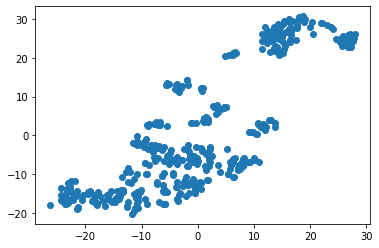

In [89]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:, 1])

In [76]:
#task 2

In [90]:
from sklearn.cluster import KMeans

In [102]:
kmeans = KMeans(n_clusters=3,max_iter=100, random_state=42)

In [103]:
labels_train = kmeans.fit_predict(X_train_scaled)

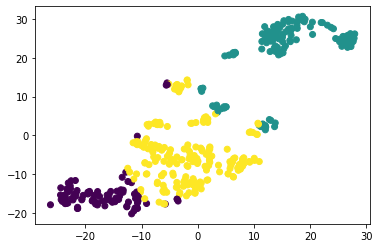

In [104]:
plt.scatter(X_train_tsne[: ,0], X_train_tsne[:, 1],c=labels_train)

In [136]:
price_mean = []
for i in range (0,3):
    price_mean.append(y_train[labels_train==i].mean())
price_mean

[price    27.788372
 dtype: float64, price    16.165354
 dtype: float64, price    24.958115
 dtype: float64]

In [137]:
CRIM_mean = []
for i in range (0,3):
    CRIM_mean.append(X_train.loc[labels_train==i,'CRIM'].mean())
CRIM_mean

[0.07356558139534886, 10.797028425196853, 0.42166020942408367]

In [138]:
# task 3
labels_test = kmeans.predict(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

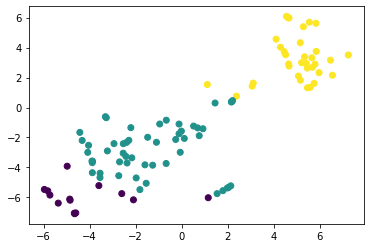

In [139]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1],c=labels_test)

In [140]:
CRIM_mean = []
for i in range (0,3):
    CRIM_mean.append(X_test.loc[labels_test==i,'CRIM'].mean())
CRIM_mean

[0.08618571428571427, 0.25200716981132076, 10.165531142857143]

In [141]:
price_mean = []
for i in range (0,3):
    price_mean.append(y_test[labels_test==i].mean())
price_mean

[price    33.871429
 dtype: float64, price    21.55283
 dtype: float64, price    16.437143
 dtype: float64]